In [2]:
# basic libraries       
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import pyspark
from pyspark.sql import SparkSession, DataFrameNaFunctions
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import Binarizer, VectorAssembler, StringIndexer, VectorIndexer

# state control
state = 1
np.random.seed(state)

# To plot pretty figures
import seaborn as sns 
plt.style.use('seaborn')
sns.set(style="ticks", color_codes=True)

# Directories
PROJECT_ROOT_DIR = '/home/tulan/PycharmProjects/Google/Machine_Learning/Machine Learning With Big Data/'
DATA_DIR = '/home/tulan/PycharmProjects/Google/Machine_Learning/Machine Learning With Big Data/data/'
IMAGE_DIR = PROJECT_ROOT_DIR + 'images'

# save the figures
def save_fig(fig_id, tight_layout=True):
    if not os.path.exists(IMAGE_DIR):
        os.makedirs(IMAGE_DIR)
    path = os.path.join(IMAGE_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Word Count") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
    

In [4]:
df = spark.read.csv(DATA_DIR + 'daily_weather.csv', header=True, inferSchema=True)

In [44]:
df.columns

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [8]:
df.printSchema()

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



In [9]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138094,3.184161180386833,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287072,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.2355107005759,69.13785928889189,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.5528134655317185,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.95351796516923,67.23801294602953,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.598209170780958,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574893,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.0787786601481,0.0,17704.0


In [10]:
df.describe()

DataFrame[summary: string, number: string, air_pressure_9am: string, air_temp_9am: string, avg_wind_direction_9am: string, avg_wind_speed_9am: string, max_wind_direction_9am: string, max_wind_speed_9am: string, rain_accumulation_9am: string, rain_duration_9am: string, relative_humidity_9am: string, relative_humidity_3pm: string]

In [11]:
df.describe('air_pressure_9am').show()

+-------+-----------------+
|summary| air_pressure_9am|
+-------+-----------------+
|  count|             1092|
|   mean|918.8825513138094|
| stddev|3.184161180386833|
|    min|907.9900000000024|
|    max|929.3200000000012|
+-------+-----------------+



In [13]:
df.count()

1095

In [14]:
df2 = df.na.drop(subset=['rain_accumulation_9am'])

In [15]:
df2.count()

1089

In [17]:
df2.stat.corr('relative_humidity_9am', 'relative_humidity_3pm')

0.8830403147328106

In [5]:
df_pd = pd.DataFrame(df.toPandas())
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
number                    1095 non-null int32
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10), int32(1)
memory usage: 89.9 KB


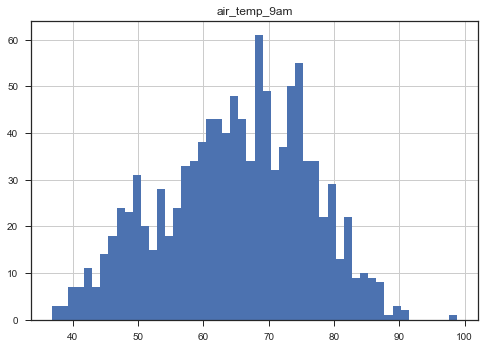

In [29]:
df_pd.hist(column='air_temp_9am', bins=50)
plt.show()

In [32]:
df_pd[df_pd['max_wind_speed_9am'] == np.max(df_pd['max_wind_speed_9am'])]['max_wind_direction_9am']

97    68.0
Name: max_wind_direction_9am, dtype: float64

In [33]:
df_noNA = df_pd.dropna()
df_noNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1094
Data columns (total 11 columns):
number                    1064 non-null int32
air_pressure_9am          1064 non-null float64
air_temp_9am              1064 non-null float64
avg_wind_direction_9am    1064 non-null float64
avg_wind_speed_9am        1064 non-null float64
max_wind_direction_9am    1064 non-null float64
max_wind_speed_9am        1064 non-null float64
rain_accumulation_9am     1064 non-null float64
rain_duration_9am         1064 non-null float64
relative_humidity_9am     1064 non-null float64
relative_humidity_3pm     1064 non-null float64
dtypes: float64(10), int32(1)
memory usage: 95.6 KB


In [41]:
df_q1 = df_noNA[(df_noNA['air_pressure_9am'] >= 911.736) &  
              (df_noNA['air_pressure_9am'] <= 914.67)]
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 26 to 1093
Data columns (total 11 columns):
number                    77 non-null int32
air_pressure_9am          77 non-null float64
air_temp_9am              77 non-null float64
avg_wind_direction_9am    77 non-null float64
avg_wind_speed_9am        77 non-null float64
max_wind_direction_9am    77 non-null float64
max_wind_speed_9am        77 non-null float64
rain_accumulation_9am     77 non-null float64
rain_duration_9am         77 non-null float64
relative_humidity_9am     77 non-null float64
relative_humidity_3pm     77 non-null float64
dtypes: float64(10), int32(1)
memory usage: 6.9 KB


In [56]:
df_q2 = pd.DataFrame(df_pd['air_temp_9am'])
df_q2.describe(), len(df_q2)

(       air_temp_9am
 count   1090.000000
 mean      64.933001
 std       11.175514
 min       36.752000
 25%       57.281000
 50%       65.715479
 75%       73.450974
 max       98.906000, 1095)

In [57]:
len(df_q2[df_q2['air_temp_9am'] < 42.292])

23

In [59]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
number                    1095 non-null int32
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10), int32(1)
memory usage: 89.9 KB


In [20]:
df_q3 = df.drop('number')
df_q3 = df_q3.dropna()

In [23]:
df_q3.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
air_pressure_9am,1064,918.9031798641051,3.1790395342048496,907.9900000000024,929.3200000000012
air_temp_9am,1064,65.02260949558733,11.168033449415704,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1064,142.30675564934037,69.14947215860062,15.500000000000046,343.4
avg_wind_speed_9am,1064,5.48579305071369,4.534427253459236,0.69345139999974,23.554978199999763
max_wind_direction_9am,1064,148.48042413321315,67.15491055520599,28.89999999999991,312.19999999999993
max_wind_speed_9am,1064,6.999713658875691,5.590789883333875,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1064,0.18202347650615522,1.534493272239725,0.0,24.01999999999907
rain_duration_9am,1064,266.3936973996037,1503.0922161525937,0.0,17704.0
relative_humidity_9am,1064,34.07743985327709,25.35666812000875,6.090000000001012,92.6200000000002


In [24]:
binarizer = Binarizer(threshold=24.99999, inputCol='relative_humidity_3pm', outputCol='label')
df_q3_new = binarizer.transform(df_q3)

In [26]:
assembler = VectorAssembler(inputCols=df_q3_new.columns[:-2], outputCol='features')
assembled = assembler.transform(df_q3_new)

In [30]:
trainingData, testData = assembled.randomSplit([0.8, 0.2], seed=13234)

In [31]:
trainingData.count(), testData.count()

(859, 205)

In [32]:
dt = DecisionTreeClassifier(labelCol='label', featuresCol='features', 
                            maxDepth=5, minInstancesPerNode=20, impurity='gini')
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(trainingData)

In [33]:
predictions = model.transform(testData)

In [37]:
predictions.select('prediction', 'label').show(10)

+----------+-----+
|prediction|label|
+----------+-----+
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
+----------+-----+
only showing top 10 rows



In [38]:
trainingData, testData = assembled.randomSplit([0.7, 0.3], seed=13234)
trainingData.count(), testData.count()

(742, 322)